### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #6

## Support Vector Machines (SVM)

[SVM module documentation](https://scikit-learn.org/stable/modules/svm.html#svm)

[LinearSVC documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC)

[SVC documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC  # fast but only linear
from sklearn.svm import SVC  # slower but can do kernels

In [3]:
# Load the iris data
iris = datasets.load_iris()
X = iris.data[:, 2:]
y = iris.target

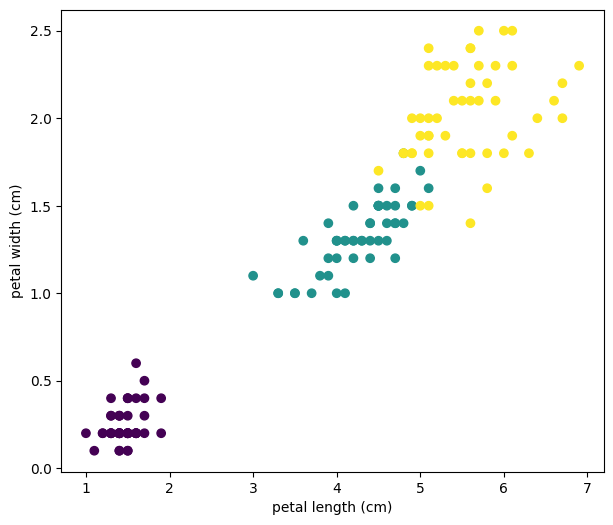

In [4]:
# Plot the data
plt.figure(figsize=(7,6))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.show()

#### In this problem, you'll use support vector machines to classify the Iris data

#### The following function helps you plot the decision boundary.

In [5]:
# Plot the decision boundaries
def plot_decision_boundary(clf, X, y):
    h = 0.005  # Boundary lines' resolution
    x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
    y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(7,6))
    plt.contourf(xx, yy, Z, alpha=0.25)  # Background
    plt.contour(xx, yy, Z, colors='k', linewidths=0.2)  # Boundary lines
    plt.scatter(X[:,0], X[:,1], c=y);  # Data points
    plt.xlabel(iris.feature_names[2])
    plt.ylabel(iris.feature_names[3])

#### Exercise 1. Split the data into training set and test set.

In [6]:
#TODO

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=0, test_size=0.2)
len(train_X), len(test_X)

(120, 30)

#### Exercise 2. Learn a linear SVM classifier using sklearn.svm.LinearSVC. You will need to set `loss='hinge'`.

#### Try different values of the tradeoff parameter: `C = 0.01, 0.1, 1.0, 10.0, 100.0` and use `plot_decision_boundary` to plot the decision boundary.

#### If you encounter `RuntimeError`, consider setting `max_iter=100000`

#### What is the effect of `C` on the decision boundary?

C:\Users\Sawit\AppData\Roaming\Python\Python312\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


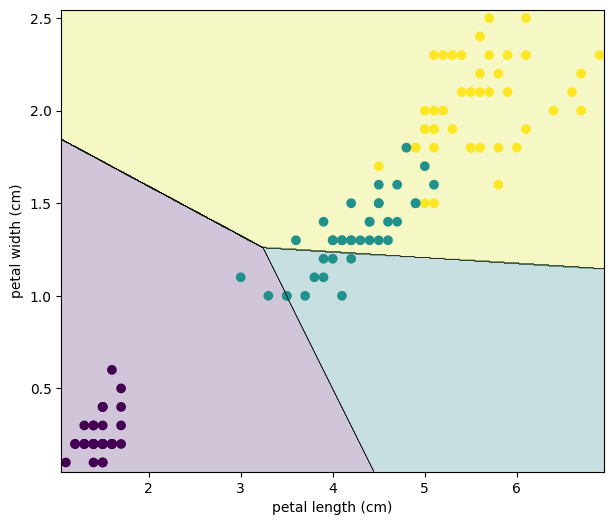

In [7]:
#TODO

LinearSVC_model = LinearSVC(C = 1.0, loss='hinge')
LinearSVC_model.fit(train_X, train_y)
plot_decision_boundary(LinearSVC_model, train_X, train_y)

* ทดลองเปลี่ยนค่า C ไปเรื่อยๆ และพล็อตกราฟเพื่อสังเกต

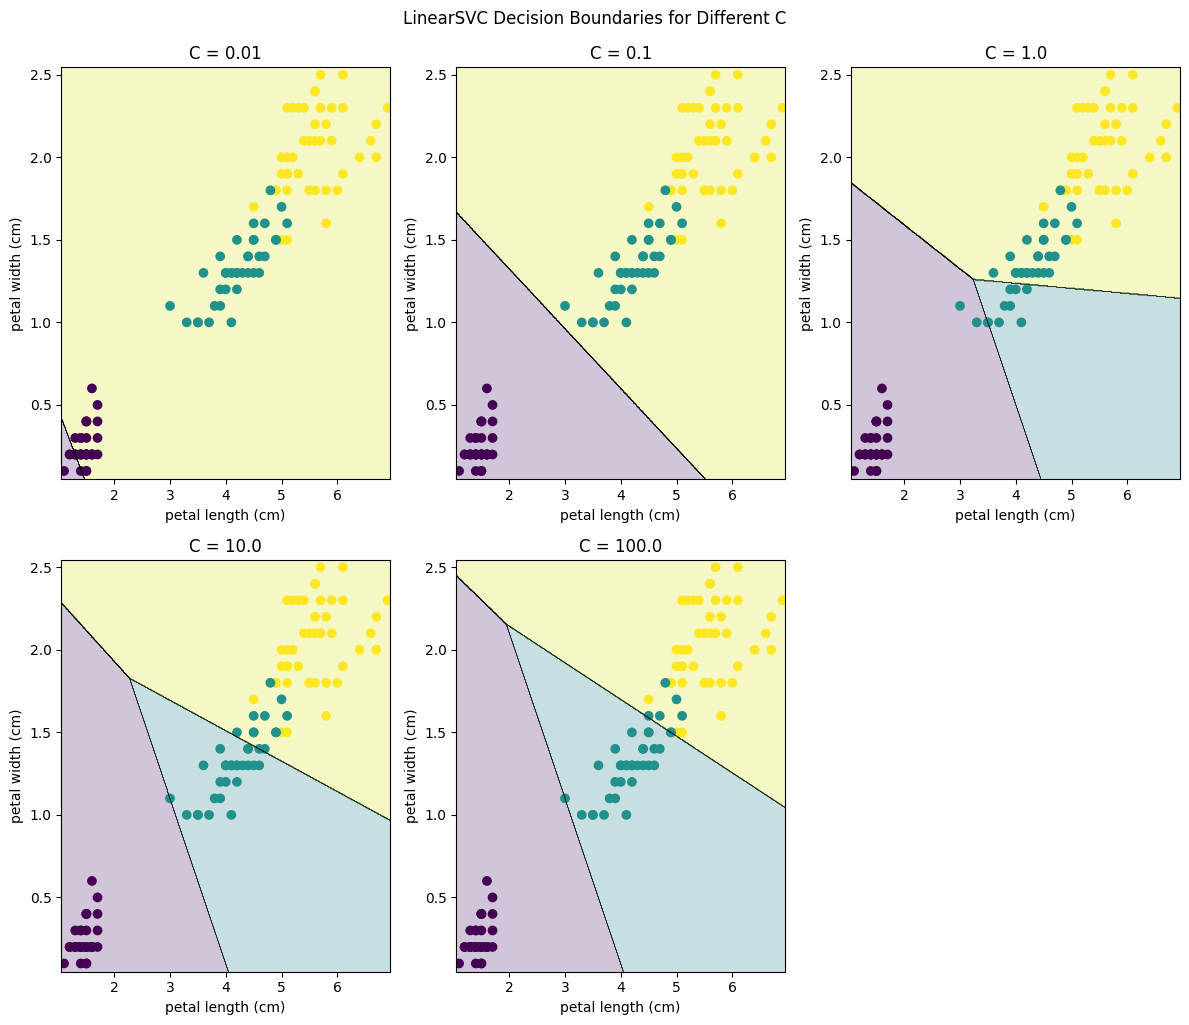

In [18]:
C_values = [0.01, 0.1, 1.0, 10.0, 100.0]
plt.figure(figsize=(12, 10))

for i, C in enumerate(C_values):
    model = LinearSVC(C=C, loss='hinge', max_iter=100000)
    model.fit(train_X, train_y)

    h = 0.005
    x_min, x_max = train_X[:,0].min() - 10*h, train_X[:,0].max() + 10*h
    y_min, y_max = train_X[:,1].min() - 10*h, train_X[:,1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.subplot(2, 3, i+1)
    plt.contourf(xx, yy, Z, alpha=0.25)
    plt.contour(xx, yy, Z, colors='k', linewidths=0.2)
    plt.scatter(train_X[:,0], train_X[:,1], c=train_y)
    plt.title(f'C = {C}')
    plt.xlabel(iris.feature_names[2])
    plt.ylabel(iris.feature_names[3])

plt.tight_layout()
plt.suptitle('LinearSVC Decision Boundaries for Different C', y=1.02)
plt.show()

จากรูปภาพ จะสังเกตว่า `C` คือค่าที่ใช้ควบคุมการลงโทษ (Penaltize) กรณีที่โมเดลทำนายผิด หรือพูดง่าย ๆ คือการควบคุมความกว้างของ margin ระหว่างกลุ่มข้อมูล

* ถ้า `C` มีค่าน้อย โมเดลจะยอมให้เกิดการทำนายผิดได้มากขึ้น ส่งผลให้ margin กว้างขึ้นและ boundary เรียบขึ้น (โมเดลอาจจะ underfit ได้)

* ถ้า `C` มีค่ามาก โมเดลจะพยายามจำแนกข้อมูลให้ถูกต้องมากที่สุด ส่งผลให้ margin แคบลงและ boundary ซับซ้อนขึ้น (โมเดลอาจจะ overfit ได้)

#### Exercise 3. Pick a value of `C` that you like. Then report the test error.

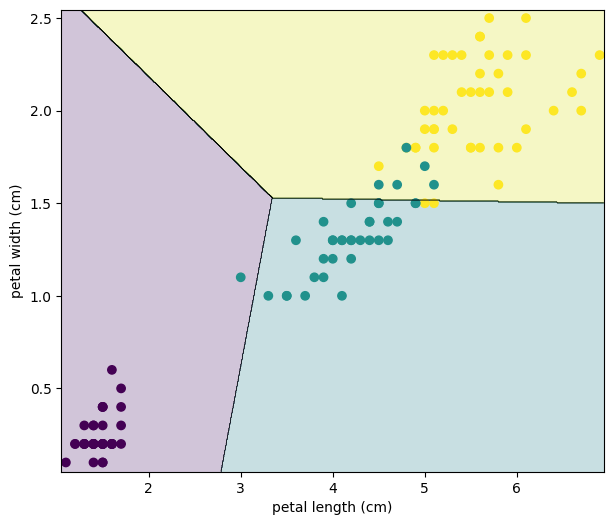

In [ ]:
c = 100

LinearSVC_model = LinearSVC(C=c, loss='hinge')
LinearSVC_model.fit(train_X, train_y)
plot_decision_boundary(LinearSVC_model, train_X, train_y)

* Report the test error

In [13]:
from sklearn.metrics import classification_report, accuracy_score

test_pred = LinearSVC_model.predict(test_X)
print(classification_report(test_y, test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      1.00      0.96        13
           2       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



In [17]:
test_accuracy = accuracy_score(test_y, test_pred)
test_error = (1 - test_accuracy) * 100
print(f"Test error for C={c}: {test_error:.2f} %")

Test error for C=100: 3.33 %


#### Exercise 4. Now try kernel SVM with a quadratic kernel. You can do this with sklearn.svm.SVC, setting `kernel='rbf'` and `C = 1.0`.

#### Try different values of the tradeoff parameter: `gamma = 0.01, 0.1, 1.0, 10.0, 100.0` and use `plot_decision_boundary` to plot the decision boundary.

#### If you encounter `RuntimeError`, consider setting `max_iter=100000`

#### What is the effect of `gamma` on the decision boundary?

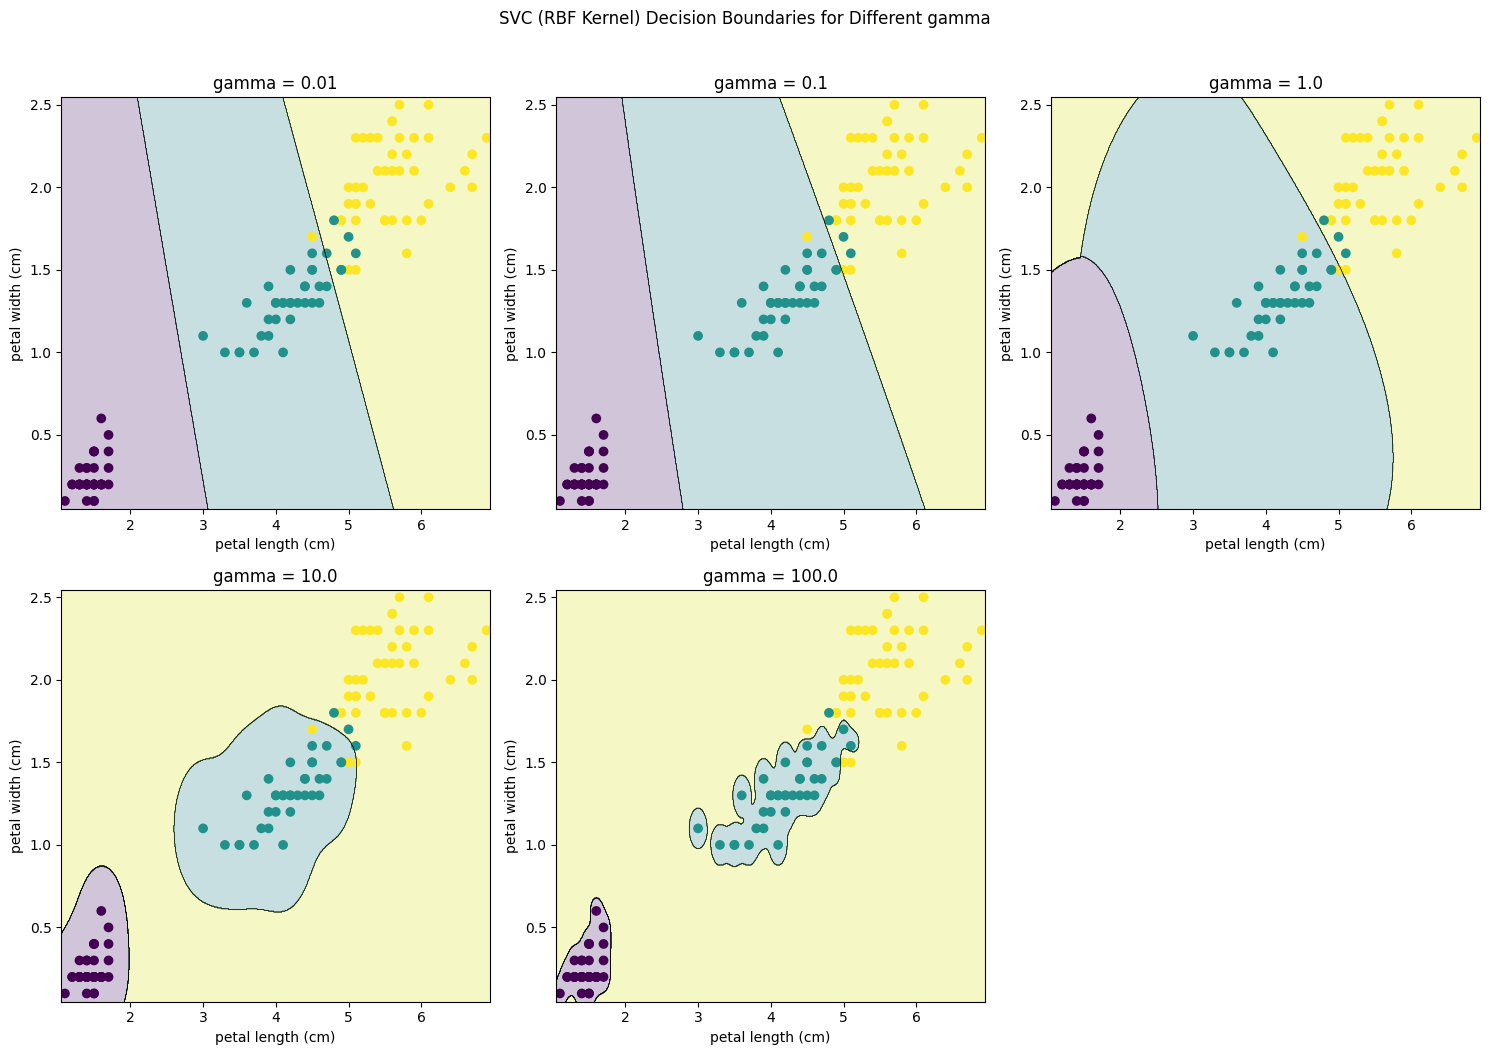

In [27]:
# Exercise 4: Kernel SVM with RBF kernel, using meshgrid for decision boundaries

from sklearn.svm import SVC

gamma_values = [0.01, 0.1, 1.0, 10.0, 100.0]
plt.figure(figsize=(15, 10))

h = 0.005
x_min, x_max = train_X[:,0].min() - 10*h, train_X[:,0].max() + 10*h
y_min, y_max = train_X[:,1].min() - 10*h, train_X[:,1].max() + 10*h
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

for i, gamma in enumerate(gamma_values):
    model = SVC(kernel='rbf', C=1.0, gamma=gamma)
    model.fit(train_X, train_y)

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.subplot(2, 3, i+1)
    plt.contourf(xx, yy, Z, alpha=0.25)
    plt.contour(xx, yy, Z, colors='k', linewidths=0.2)
    plt.scatter(train_X[:,0], train_X[:,1], c=train_y)
    plt.title(f'gamma = {gamma}')
    plt.xlabel(iris.feature_names[2])
    plt.ylabel(iris.feature_names[3])

plt.tight_layout()
plt.suptitle('SVC (RBF Kernel) Decision Boundaries for Different gamma', y=1.05)
plt.show()

จากรูปภาพ จะสังเกตว่า `gamma` คือค่าที่ใช้ควบคุมความกว้างของอิทธิพลของแต่ละจุดข้อมูล

ถ้า `gamma` มีค่าน้อย decision boundary จะเรียบและกว้าง โมเดลจะมองภาพรวมมากขึ้น (แต่โมเดลอาจจะ underfit)

ถ้า `gamma` มีค่ามาก decision boundary จะซับซ้อน (Complex) และแคบ โมเดลจะพยายามแยกข้อมูลแต่ละจุดให้ดีที่สุด (แต่โมเดลอาจจะ overfit)


#### Exercise 5. Pick a value of `gamma` that you like. Then report the test error and the number of support vectors.

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

gamma = 1  
model = SVC(kernel='rbf', C=1.0, gamma=gamma)
model.fit(train_X, train_y)

test_pred = model.predict(test_X)
test_accuracy = accuracy_score(test_y, test_pred)

test_error = (1 - test_accuracy) * 100

num_support_vectors = model.n_support_.sum()

print(f"Test error for gamma={gamma}: {test_error:.2f} %")
print(f"Number of support vectors: {num_support_vectors}")

print(classification_report(test_y, test_pred))

Test error for gamma=1: 0.00 %
Number of support vectors: 28
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



#### Exercise 6. Between Linear SVM and Kernel SVM, which model would you prefer to use for classification of Iris data?
1. Explain using test accuracy
2. Explaing using decision boundary plot

### ตอบ

1. อธิบายด้วย Test accuracy
   Kernel SVM จะได้ test accuracy สูงกว่า Linear SVM เพราะสามารถจับขอบเขตที่ไม่เป็นเส้นตรงได้ดี กรณีที่ข้อมูลมีความซับซ้อนหรือมีลักษณะไม่เป็นเส้นตรง Kernel SVM จะจำแนกข้อมูลได้แม่นยำกว่า (เรียกว่าจับ Non-linear data ได้ดีกว่า)

2. อธิบายด้วย decision boundary plot
   จากกราฟ Kernel SVM จะมี decision boundary ที่ complex และสามารถล้อมครอบกลุ่มข้อมูลได้ดีกว่า Linear SVM ซึ่งมีขอบเขตเป็นเส้นตรง ดังนั้น Kernel SVM เหมาะกับข้อมูลที่มีลักษณะซับซ้อนมากกว่า


สรุปถ้าข้อมูลมีลักษณะไม่เป็นเส้นตรงหรือ boundary ซับซ้อน ควรเลือก Kernel SVM แต่ถ้าข้อมูลแบ่งกลุ่มด้วยเส้นตรงได้ดี Linear SVM ก็เพียงพอและเร็วกว่า

---

นางสาวจิราภรณ์ จันธิวงศ์ 660510735